In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
LB =LabelBinarizer()

In [ ]:
LB.fit_transform(['Presence','Absence'])

array([[1],
       [0]])

In [ ]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
df.Heart_Disease[df.Heart_Disease == 'Presence'] = 1
df.Heart_Disease[df.Heart_Disease == 'Absence'] = 0
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#total percentage of missing data
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


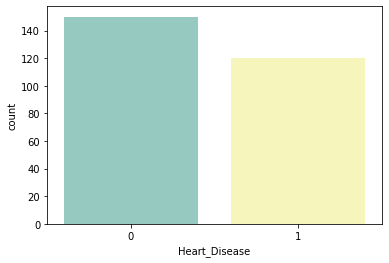

There are 150 patients without heart disease and 120 patients with the disease


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Heart_Disease',data=df,palette ='Set3')
plt.show()
cases = df.Heart_Disease.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

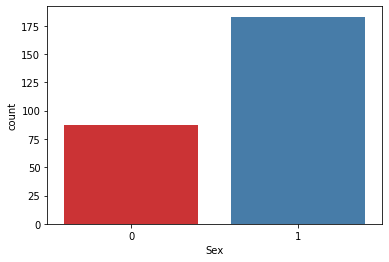

There are 87 Female Patients and 183 Male Patients


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Sex',data=df,palette ='Set1')
plt.show()
cases = df.Sex.value_counts()
print(f"There are {cases[0]} Female Patients and {cases[1]} Male Patients")

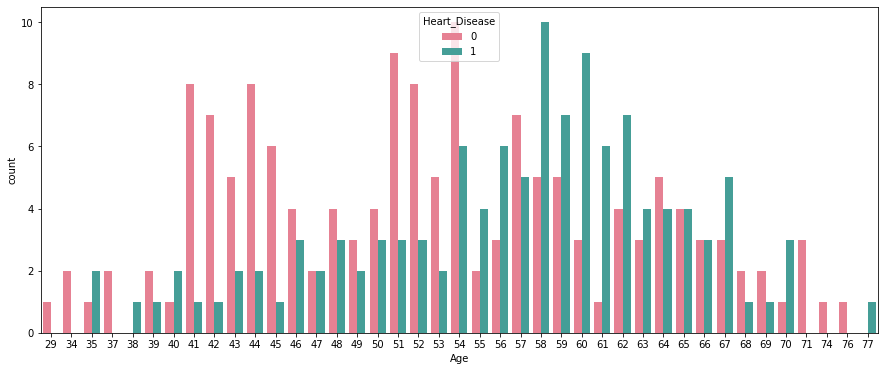

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data = df, hue = 'Heart_Disease',palette='husl')
plt.show()

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y=y.astype('int')

In [ ]:
print(X)
print(y)

[[70.  1.  4. ...  2.  3.  3.]
 [67.  0.  3. ...  2.  0.  7.]
 [57.  1.  2. ...  1.  0.  7.]
 ...
 [56.  0.  2. ...  2.  0.  3.]
 [57.  1.  4. ...  2.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]]
[1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 1]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel = 'rbf',random_state = 0,gamma=0.1,C=0.5)

In [ ]:
svc.fit(X_train,y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred=svc.predict(X_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_test),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]]


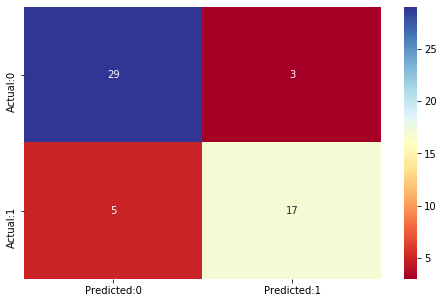

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="RdYlBu")

In [ ]:
cm

array([[29,  2],
       [ 6, 17]], dtype=int64)

In [ ]:
from sklearn.model_selection import cross_val_score
cC = cross_val_score(estimator = svc,X = X_train, y = y_train,cv=10)
print('Accuracy:{:.2f} %'.format(cC.mean()*100))
print('Accuracy:{:.2f} %'.format(cC.std()*100))

Accuracy:82.34 %
Accuracy:6.95 %


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'C':[0.25,0.5,0.75,1], 'kernel':['linear']},
             {'C':[0.25,0.5,0.75,1], 'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid = GridSearchCV(estimator = svc,
                   param_grid = parameters,
                   scoring = 'accuracy',
                   cv = 10,
                   n_jobs = -1)
grid.fit(X_train,y_train)
best_accuracy = grid.best_score_
best_parameters = grid.best_params_
print('Accuracy:{:.2f} %'.format(best_accuracy*100))
print('Accuracy:{:.2f} %', best_parameters)

Accuracy:82.84 %
Accuracy:{:.2f} % {'C': 0.25, 'kernel': 'linear'}
